<H3><span style="color:teal">RETAIL IMAGE CLASSIFICATION DEMO</span></H3>

We'll use the retail images we picked up from the **Image Search API** and build a convolutional neural net **(CNN)** based on training from a pre-trained network.

In [4]:
# Import the required libraries

import os,_config,swat,graphviz

Connect to the CAS Server - <span style="color:teal">**Simple & Easy!**</span>

In [2]:
user,pswd = _config.login()
host='10.104.19.252' #beast
portnum=5570 #CAS Binary Port
conn = swat.CAS(host,portnum,user,pswd)

In [3]:
# Change the caslib to the one we would want to use
conn.setsessopt(caslib='casuser')

NOTE: 'CASUSER(viyademo01)' is now the active caslib.


+ Elapsed: 0.0153s, user: 0.00362s, sys: 0.0058s, mem: 0.824mb

In [4]:
# Inspect a path using file info CAS action
conn.fileinfo('retail_images')

,Permission,Owner,Group,Name,Size,Encryption,Time
0,drwxr-xr-x,viyademo01,marketing,shirt,8192,,05May2018:19:10:17
1,drwxr-xr-x,viyademo01,marketing,dress,8192,,05May2018:19:10:17
2,drwxr-xr-x,viyademo01,marketing,handbag,8192,,05May2018:19:10:17
3,drwxr-xr-x,viyademo01,marketing,trouser,8192,,05May2018:19:10:17
4,drwxr-xr-x,viyademo01,marketing,sunglasses,8192,,05May2018:19:10:17


In [5]:
from dlpy.images import ImageTable  #get the image table object
img_path='/home/viyademo01/casuser/retail_images' #point to the image files in the server
retail_images = ImageTable.load_files(conn, path=img_path)  # load the files 

In [7]:
# Now to check out this IMAGE TABLE 
retail_images.head()

,_image_,_label_,_filename_0
0,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,handbag,00000244.jpg
1,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x02...,shirt,00000055.jpg
2,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,handbag,00000185.jpg
3,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,shirt,00000072.jpg
4,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,shirt,00000220.jpg


In [8]:
# And the column info with the columninfo action
retail_images.columninfo()

,Column,ID,Type,RawLength,FormattedLength,NFL,NFD
0,_image_,1,varbinary,7160444,7160444,0,0
1,_label_,2,varchar,10,10,0,0
2,_filename_0,3,varchar,73,73,0,0


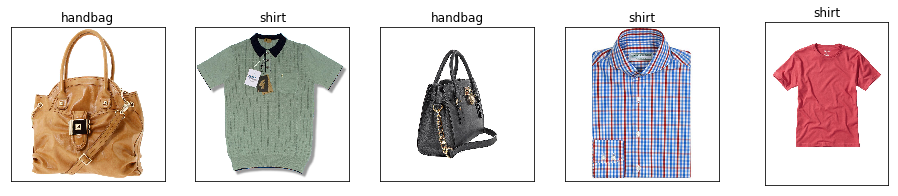

In [10]:
# Here's how we can easily check out the images
retail_images.show(nimages=5)

In [12]:
# And some basic frequency info
retail_images.label_freq

,Level,Frequency
dress,1,243
handbag,2,246
shirt,3,235
sunglasses,4,244
trouser,5,239


Next logical step is for us to get some **summary stats on the images**

In [14]:
# Like so
retail_images.image_summary

jpg                  1207
minWidth              455
maxWidth             4000
minHeight             547
maxHeight            5200
meanWidth         1198.35
meanHeight        1352.59
mean1stChannel    192.335
min1stChannel           0
max1stChannel         255
mean2ndChannel    194.321
min2ndChannel           0
max2ndChannel         255
mean3rdChannel    201.139
min3rdChannel           0
max3rdChannel         255
dtype: object

So, we have images in all *shapes* and **sizes**. We're going to have to reshape. How do we do it?

In [ ]:
# Like so
retail_images.resize(width=224,height=224,inplace=True)

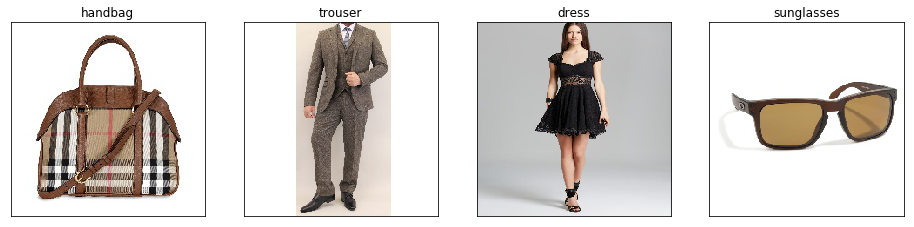

In [17]:
# Now lets take a look at them again !!
retail_images.show(nimages=4,randomize=True)

### Start building models based on Pre-Built Models

In [18]:
from dlpy.applications import *  # Get all the prebuilt models out of the box
import os
pre_trained_weights_path = '/home/viyademo01/casuser/pre_trained_models'

#### Define/Specify the model

In [24]:
model_vgg16 = VGG16(
    conn, model_table='VGG16_notop',
    n_classes=5, n_channels=3, width=224, height=224, scale=1,
    offsets=(103.939, 116.779, 123.68),
    pre_train_weight=True, 
    pre_train_weight_file=os.path.join(pre_trained_weights_path, 'vgg16/VGG_ILSVRC_16_layers.caffemodel.h5'),
    include_top=False)

NOTE: Model table is attached successfully!
NOTE: Model is named to "vgg16_notop" according to the model name in the table.


In [26]:
# We can take a look at our model this way
model_vgg16.print_summary()

*==================*===============*========*============*=================*======================*
|   Layer (Type)   |  Kernel Size  | Stride | Activation |   Output Size   | Number of Parameters |
*------------------*---------------*--------*------------*-----------------*----------------------*
| data(Input)      |     None      |  None  |    None    |  (224, 224, 3)  |        0 / 0         |
| conv1_1(Convo.)  |    (3, 3)     |   1    | Rectifier  | (224, 224, 64)  |      1728 / 64       |
| conv1_2(Convo.)  |    (3, 3)     |   1    | Rectifier  | (224, 224, 64)  |      36864 / 64      |
| pool1(Pool)      |    (2, 2)     |   2    |    Max     | (112, 112, 64)  |        0 / 0         |
| conv2_1(Convo.)  |    (3, 3)     |   1    | Rectifier  | (112, 112, 128) |     73728 / 128      |
| conv2_2(Convo.)  |    (3, 3)     |   1    | Rectifier  | (112, 112, 128) |     147456 / 128     |
| pool2(Pool)      |    (2, 2)     |   2    |    Max     |  (56, 56, 128)  |        0 / 0         |


In [27]:
from dlpy.splitting import two_way_split

tr_ret_img, te_ret_img = two_way_split(retail_images, test_rate=20, seed=123)

In [29]:
tr_ret_img.label_freq

,Level,Frequency
dress,1,194
handbag,2,197
shirt,3,188
sunglasses,4,195
trouser,5,191


In [30]:
tr_ret_img.as_patches(width=200, height=200, step_size=24, output_width=224, output_height=224)

In [31]:
tr_ret_img.label_freq

,Level,Frequency
dress,1,776
handbag,2,788
shirt,3,752
sunglasses,4,780
trouser,5,764


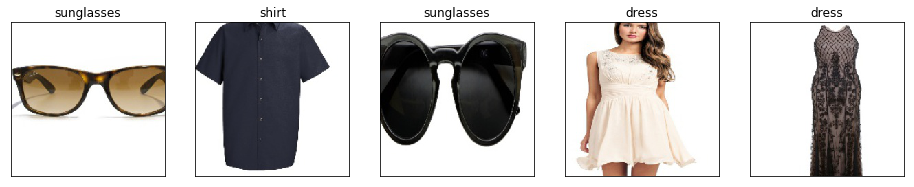

In [32]:
tr_ret_img.show(nimages=5,randomize=True)

In [33]:
model_vgg16.fit(data=tr_ret_img, mini_batch_size=1, max_epochs=3, lr=5E-3)

NOTE: Training based on existing weights.
NOTE:  The Synchronous mode is enabled.
NOTE:  The total number of parameters is 134281029.
NOTE:  The approximate memory cost is 19513.00 MB.
NOTE:  Loading weights cost       3.31 (s).
NOTE:  Initializing each layer cost      77.53 (s).
NOTE:  The total number of workers is 2.
NOTE:  The total number of threads on each worker is 24.
NOTE:  The total number of minibatch size per thread on each worker is 1.
NOTE:  The maximum number of minibatch size across all workers for the synchronous mode is 48.
NOTE:  Target variable: _label_
NOTE:  Number of levels for the target variable:      5
NOTE:  Levels for the target variable:
NOTE:  Level      0: shirt     
NOTE:  Level      1: dress     
NOTE:  Level      2: handbag   
NOTE:  Level      3: sunglasses
NOTE:  Level      4: trouser   
NOTE:  Number of input variables:     1
NOTE:  Number of numeric input variables:      1
NOTE:  Batch              nUsed   Learning Rate     Loss    Fit Error      T

NOTE:        8               48   0.005          0.0053           0        16.19
NOTE:        9               48   0.005          0.0024           0        13.42
NOTE:       10               48   0.005          0.0098           0        12.18
NOTE:       11               48   0.005          0.0108           0        13.20
NOTE:       12               48   0.005          0.0965      0.0208        17.07
NOTE:       13               48   0.005          0.0386      0.0208        14.63
NOTE:       14               48   0.005           0.002           0        13.55
NOTE:       15               48   0.005          0.0024           0        11.98
NOTE:       16               48   0.005          0.0008           0        16.86
NOTE:       17               48   0.005          0.0005           0        13.91
NOTE:       18               48   0.005          0.0012           0        14.49
NOTE:       19               48   0.005           0.029      0.0208        13.64
NOTE:       20              

NOTE:       27               48   0.005          158E-7           0        13.52
NOTE:       28               48   0.005          0.0064           0        14.34
NOTE:       29               48   0.005          0.0001           0        15.11
NOTE:       30               48   0.005          0.0011           0        17.22
NOTE:       31               48   0.005          0.0184           0        13.75
NOTE:       32               48   0.005          0.0031           0        13.60
NOTE:       33               48   0.005          0.0005           0        14.43
NOTE:       34               48   0.005          0.0015           0        18.31
NOTE:       35               48   0.005          0.0002           0        14.70
NOTE:       36               48   0.005           0.024      0.0208        14.30
NOTE:       37               48   0.005          0.0256      0.0208        16.02
NOTE:       38               48   0.005          0.0113           0        15.80
NOTE:       39              

,Descr,Value
0,Model Name,vgg16_notop
1,Model Type,Convolutional Neural Network
2,Number of Layers,22
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,13
6,Number of Pooling Layers,5
7,Number of Fully Connected Layers,2
8,Number of Weight Parameters,134268608
9,Number of Bias Parameters,12421


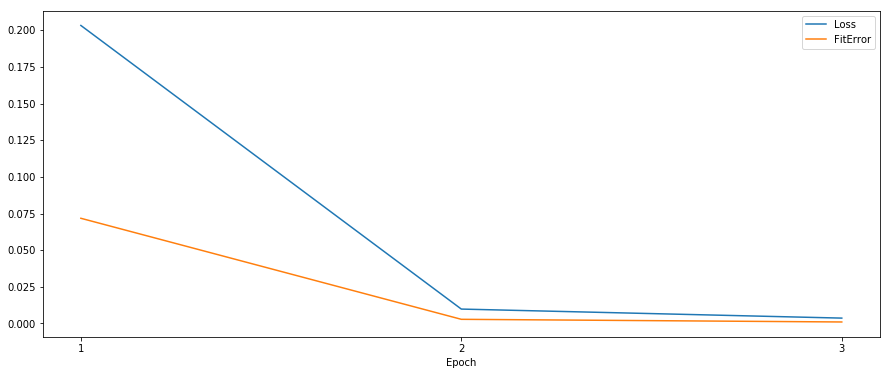

In [34]:
model_vgg16.plot_training_history(fig_size=(15, 6))

In [35]:
model_vgg16.predict(data=te_ret_img)

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read           242
 1  Number of Observations Used           242
 2  Misclassification Error (%)      1.239669
 3                   Loss Error      0.046869

[OutputCasTables]

                 casLib              Name  Rows  Columns  \
 0  CASUSER(viyademo01)  Valid_Res_y9kPJq   242       11   
 
                                             casTable  
 0  CASTable('Valid_Res_y9kPJq', caslib='CASUSER(v...  

+ Elapsed: 36.1s, user: 530s, sys: 41.9s, mem: 3.67e+04mb

In [36]:
model_vgg16.valid_conf_mat

,_label_,Col1,Col2,Col3,Col4,Col5
0,dress,47.0,0.0,2.0,0.0,0.0
1,handbag,0.0,49.0,0.0,0.0,0.0
2,shirt,1.0,0.0,46.0,0.0,0.0
3,sunglasses,0.0,0.0,0.0,49.0,0.0
4,trouser,0.0,0.0,0.0,0.0,48.0


#### An example of a correctly classified image

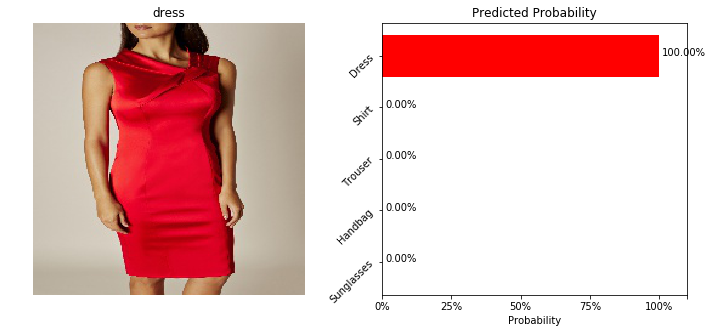

In [43]:
model_vgg16.plot_predict_res(type='C',image_id=2)

#### Misclassified Image

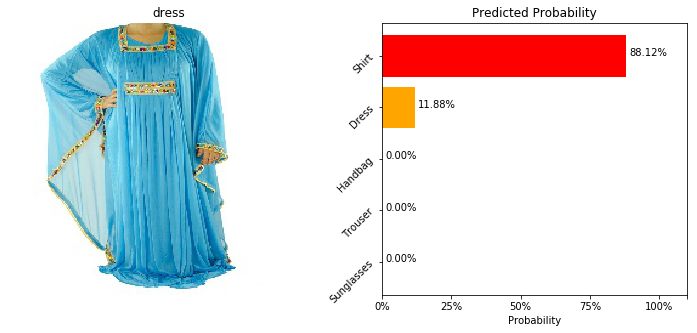

In [44]:
model_vgg16.plot_predict_res(type='M')

#### Lets get some intuition around whats being learned

NOTE: The number of images in the table is too large, only 5 randomly selected images are used in analysis.
NOTE: Table IMAGEDATA_TXPPBO contains compressed images.


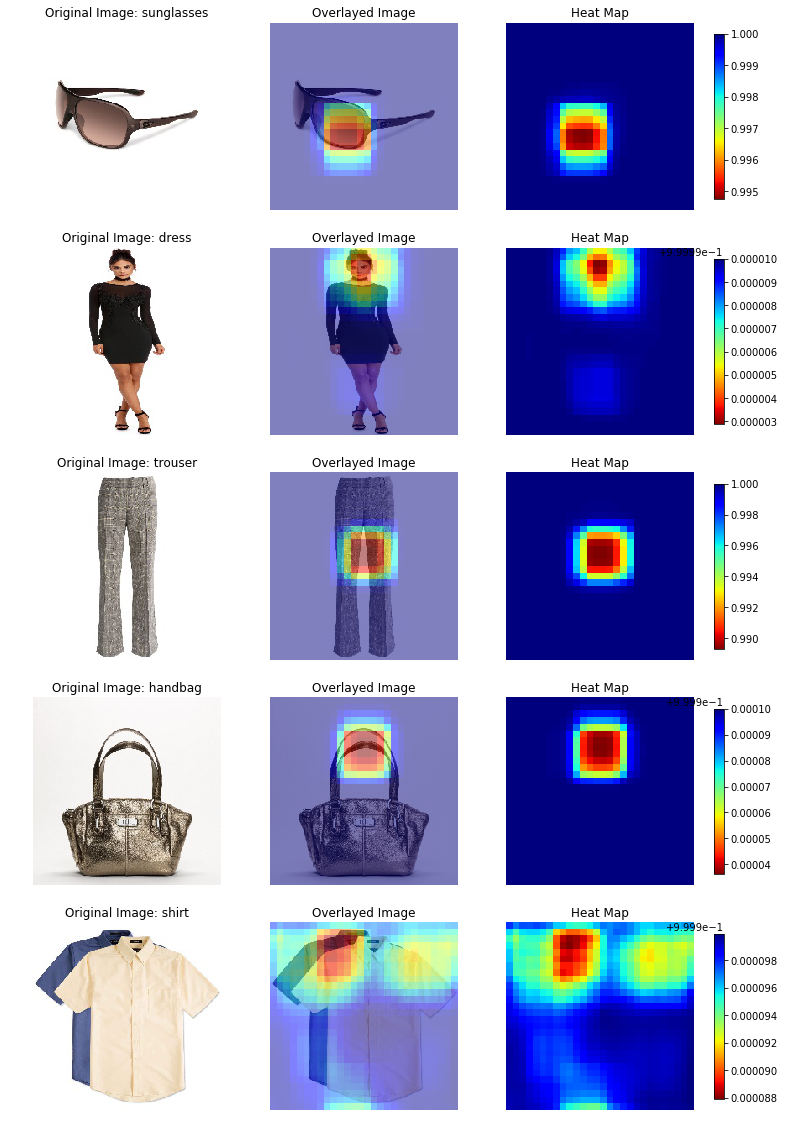

,_filename_0,_image_,_label_,heat_map
0,00000176.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,sunglasses,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
1,00000053.JPG,<PIL.JpegImagePlugin.JpegImageFile image mode=...,dress,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
2,00000075.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,trouser,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
3,00000128.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,handbag,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
4,00000114.jpg,<PIL.JpegImagePlugin.JpegImageFile image mode=...,shirt,"[[0.9999978542327881, 0.9999978542327881, 0.99..."


In [46]:
model_vgg16.heat_map_analysis(data=te_ret_img, mask_width=56, mask_height=56, step_size=8)

#### Save the astore for scoring in ESP

In [ ]:
model_vgg16.deploy(path='/tmp/retail', output_format='astore')

In [ ]:
conn.close()